## Pandas
* The Pandas library revolves around a __DataFrame__ 
    1. DataFrame is like a spreadsheet with rows and columns
    2. Each column has a header
    3. Each row has a unique identifier (index)
    4. Each row represents a single record or entry

## CSV File
* Small file based datasets can be saved in __Comma-Separated_value__ format
    1. Excel spreadsheets can be saved in this format

In [10]:
import pandas as pd

# .read_csv as the name suggests allow for the reading of a csv file
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv')

# .head(#) selects the number of rows, starting from the beginning that you want to read
df.head(5)

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
# .shape will display the number of rows and columns in the dataset
df.shape

(891, 16)

In [9]:
# .dtypes will display the datatypes of each column
# strings usually get represented as a object type
df.dtypes

Unnamed: 0       int64
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [14]:
# describe() displays a summary statistics for all of the numeric columns
df.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# .isna() checks for NAN or empty values in the dataset
# .sum() adds them up
df.isna().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Dataframe Operations vs Column Operations
* You can access dataframe columns instead of performing an operation on the whole dataset
* This can be accomplished in two ways
    1. dot syntax __df.deck__ selects the deck column
    2. square brackets __df['deck']__ selects the deck column
        * Just accessing a specific value in an object

In [17]:
df.deck
df['deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
5      NaN
6        E
7      NaN
8      NaN
9      NaN
10       G
11       C
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21       D
22     NaN
23       A
24     NaN
25     NaN
26     NaN
27       C
28     NaN
29     NaN
      ... 
861    NaN
862      D
863    NaN
864    NaN
865    NaN
866    NaN
867      A
868    NaN
869    NaN
870    NaN
871      D
872      B
873    NaN
874    NaN
875    NaN
876    NaN
877    NaN
878    NaN
879      C
880    NaN
881    NaN
882    NaN
883    NaN
884    NaN
885    NaN
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: object

In [18]:
# .isnull() will also check if the value is present
df.deck.isnull()

0       True
1      False
2       True
3      False
4       True
5       True
6      False
7       True
8       True
9       True
10     False
11     False
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21     False
22      True
23     False
24      True
25      True
26      True
27     False
28      True
29      True
       ...  
861     True
862    False
863     True
864     True
865     True
866     True
867    False
868     True
869     True
870     True
871    False
872    False
873     True
874     True
875     True
876     True
877     True
878     True
879    False
880     True
881     True
882     True
883     True
884     True
885     True
886     True
887    False
888     True
889    False
890     True
Name: deck, Length: 891, dtype: bool

### .fillna()
* As the name suggests the __.fillna()__ method will allow the filling of a NA value with measures of center such as:
    1. Mean
    2. Median
        * Only works for numerica values
    3. ffill = forward fill
    4. bfill = backward fill
        * force the missing cells to have the same value as the closest before/after cell

In [31]:
# Foward fill the embark and embark_town columns
df.embarked = df.embarked.fillna(method="ffill")
df.embark_town = df.embark_town.fillna(method="ffill")

df['embarked'].isna().sum()

0

In [32]:
df.embark_town.isna().sum()

0

In [34]:
df.embarked.isnull().sum()

0

In [35]:
# fill in missing age values with median age
# median is the middle value of all the values
# if there are two middle values, avg them together

median_age = df.age.median()
print("median age:", median_age)

df.age = df.age.fillna(median_age)

df.age.isna().sum()

median age: 28.0


0

### .drop()
* This will drop said row or column
* By default it will drop rows
* In order to drop a column , the __axis = 1 __ parameter must be specified

In [38]:
# drop a row
df = df.drop(0)
df.head(5)

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


In [39]:
# drop a column
df = df.drop('deck', axis=1)
df.head(5)

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,Queenstown,no,True


In [40]:
df.isna().sum()

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## Matplotlib
* Library used to create graphs and other insightful visualizations

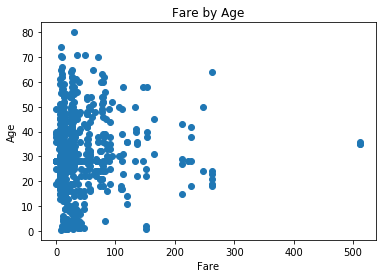

In [43]:
import matplotlib.pyplot as plt

# create a scatterplot with fare and age values as x,y axis respectively
plt.scatter(df['fare'], df['age'])

# add x y labels
plt.xlabel("Fare")
plt.ylabel("Age")
plt.title("Fare by Age")

# print out the graph using show
plt.show()